# Classifieur Bayesien (naïf)

Nous proposons de travailler sur des données décrivant des films. Les possibilités sont larges et vous êtes évalués sur vos propositions et votre méthodologie plus que sur vos résultats.

Les données de départ sont disponibles sur:
https://grouplens.org/datasets/movielens/
au format CSV. 

Nous nous intéresserons en particulier au jeu de données: **MovieLens 20M Dataset**. Dans ce jeu de données, vous disposez entre autre de:
* Idendifiant du film dans IMdb et TMdb (ça sera important ensuite)
* Catégorie(s) du film
* Titre du film
* Notes données par les internautes aux films

Afin de rendre le projet plus intéressant, nous ajoutons des données sur les acteurs et producteurs associés aux films (récupéré sur TMdb). Ces données sont disponibles sur les liens suivants:

http://webia.lip6.fr/~guigue/film_v2.pkl <br>
http://webia.lip6.fr/~guigue/act_v2.pkl <br>
http://webia.lip6.fr/~guigue/crew_v2.pkl

Ces fichiers contiennent respectivement : une nouvelle description des films (dont l'identifiant TMdb et la note moyenne donnée par les internautes, la date de sortie,...), une description des acteurs de chaque film et une description des équipes (scénariste, producteur, metteur en scène) pour chaque film.

Ces données sont des listes de taille 26908, chaque élément de la liste correspondant à un dictionnaire dont vous étudierez les clés pour récupérer les informations utiles.

**ATTENTION** Les contraintes de récupération d'informations en ligne font que la base MovieLens compte 27278 films mais les fichiers ci-dessus n'en comptent que 26908. Le plus simple est probablement d'éliminer les films de MovieLens qui ne sont pas dans cette seconde base.

## Consignes générales pour l'analyse des données

Vous devez proposer plusieurs analyses des données, qui devront à minima utiliser les
 techniques suivantes:
 
1. Mettre en forme les données pour identifier les acteurs et les catégories, les indexer
1. Traiter au moins un problème de régression supervisé (par exemple la prédiction de la note moyenne donnée à un film par les internautes).
1. Traiter au moins un problème de classification supervisé (par exemple la prédiction de la catégorie d'un film)
1. Utiliser les données catégorielles (catégories, acteurs,...) de manière discrète ET de manière coninue (*dummy coding*) dans des approches différentes
1. Proposer au moins une approche de catégorisation non supervisée (pour regrouper les acteurs par exemple)
1. Mener une campagne d'expérience permettant de comparer les performances sur un problème en fonction des valeurs d'un paramètre (et donc, in fine, trouver la meilleure valeur du paramètre)
1. Proposer quelques illustrations

In [1]:
import numpy as np
import string
import os
import pandas as pd
import time
import matplotlib.pyplot as plt
import random
%matplotlib inline
import pickle as pkl
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('..')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl


## Chargement des données (base MovieLens + enrichissements)

In [2]:
# Chargement des données MovieLens
fname_r = "./ml-20m/links.csv"
ratings = pd.read_csv(fname_r, encoding='utf8')

# Chargement des données MovieLens
fname_links = "./ml-20m/movies.csv"
movies_set = pd.read_csv(fname_links, encoding='utf8')
movies = movies_set.copy()
movies.set_index('movieId', inplace=True)
fname_links = "./ml-20m/links.csv"
links = pd.read_csv(fname_links, encoding='utf8')

# Chargement des données MovieLens
fname_links = "./ml-20m/genome-tags.csv"
genometags = pd.read_csv(fname_links, encoding='utf8')

fname_links = "./ml-20m/genome-scores.csv"
genomescores = pd.read_csv(fname_links, encoding='utf8')

fname_links = "./ml-20m/tags.csv"
tags = pd.read_csv(fname_links, encoding='utf8')

# Chargement des données complémentaires
fname = "./film_v2.pkl"
films = pkl.load(open(fname, "rb"))

# Chargement des données complémentaires
fname = "./act_v2.pkl"
acteurs = pkl.load(open(fname, "rb"))
# Chargement des données complémentaires
fname = "./crew_v2.pkl"
crew = pkl.load(open(fname, "rb"))


In [3]:
def pretraitement(input_str):
    """ Retire la ponctuation, les mots vides
    Passe la chaine input_str en minsucule,
    prend la racine des mots grâce au stemmer"""
    result = input_str.translate(str.maketrans('', '', string.punctuation))
    lower_case = result.lower()
    words = lower_case.split()
    stops = set(stopwords.words("english"))
    meaningful_words = []
    stemmer= PorterStemmer()
    
    for w in words:
        if not w in stops:
            meaningful_words.append(stemmer.stem(w))
    return (meaningful_words)


In [4]:
pretraitement('hello i am 234 print ')
MyEmptydf = pd.DataFrame()
df = pd.DataFrame(columns=['mot'])
dico = {}
dico['mot']=[]
start = time.time()
for i in films:
    for j in pretraitement(i['overview']):
        dico['mot'].append(j)
end = time.time()

In [5]:
dico['mot']

['led',
 'woodi',
 'andi',
 'toy',
 'live',
 'happili',
 'room',
 'andi',
 'birthday',
 'bring',
 'buzz',
 'lightyear',
 'onto',
 'scene',
 'afraid',
 'lose',
 'place',
 'andi',
 'heart',
 'woodi',
 'plot',
 'buzz',
 'circumst',
 'separ',
 'buzz',
 'woodi',
 'owner',
 'duo',
 'eventu',
 'learn',
 'put',
 'asid',
 'differ',
 'sibl',
 'judi',
 'peter',
 'discov',
 'enchant',
 'board',
 'game',
 'open',
 'door',
 'magic',
 'world',
 'unwittingli',
 'invit',
 'alan',
 'adult',
 'who',
 'trap',
 'insid',
 'game',
 '26',
 'year',
 'live',
 'room',
 'alan',
 'hope',
 'freedom',
 'finish',
 'game',
 'prove',
 'riski',
 'three',
 'find',
 'run',
 'giant',
 'rhinoceros',
 'evil',
 'monkey',
 'terrifi',
 'creatur',
 'famili',
 'wed',
 'reignit',
 'ancient',
 'feud',
 'nextdoor',
 'neighbor',
 'fish',
 'buddi',
 'john',
 'max',
 'meanwhil',
 'sultri',
 'italian',
 'divorcé',
 'open',
 'restaur',
 'local',
 'bait',
 'shop',
 'alarm',
 'local',
 'worri',
 'shell',
 'scare',
 'fish',
 'away',
 'she',

In [6]:
genres = set(movies["genres"])
categories = set()
for i in genres:
    for j in i.split("|"):
        categories.add(j)
categories = list(categories)
categories.sort()
categories
a=0
dic_cat = {}
for i in categories:
    dic_cat[i] = a
    a += 1
dic_cat

{'(no genres listed)': 0,
 'Action': 1,
 'Adventure': 2,
 'Animation': 3,
 'Children': 4,
 'Comedy': 5,
 'Crime': 6,
 'Documentary': 7,
 'Drama': 8,
 'Fantasy': 9,
 'Film-Noir': 10,
 'Horror': 11,
 'IMAX': 12,
 'Musical': 13,
 'Mystery': 14,
 'Romance': 15,
 'Sci-Fi': 16,
 'Thriller': 17,
 'War': 18,
 'Western': 19}

In [7]:
len(list(dic_cat.keys()))
def init_proba(categories,dico_mots):
    """initialise le tableau proba avec comme clés les mots des descriptions,
    et comme valeur un dictionnaire de la forme proba[mot][categorie] categorie:0 pour chaque categorie"""
    proba = {}
    for i in dico_mots:
        if not i in proba.keys():
            proba[i]={}
            for j in categories:
                proba[i][j]=0
    total = {}
    for i in categories:
        total[i]=0
    return proba,total

def categoriesfilm(tmdbid,links, movies):
    """retourne la liste des catégories de la base"""
    mid = tmdbidTOmovieId(links, tmdbid)
    genres = set(movies.loc[mid['movieId']]["genres"])
    categories = set()
    for i in genres:
        if isinstance(i, str):
            for j in i.split("|"):
                categories.add(j)
    categories = list(categories)
    categories.sort()
    categories
    return categories

def probacond(description, categories, proba, total):
    """renvoie 2 dictionnaires : proba qui compte les occurences de chaque mots par catégorie
    et total qui compte le nombre total de mots par catégorie """
    list_mots = pretraitement(description)
    for genre in categories:
        for mot in list_mots:
            proba[mot][genre] += 1
            total[genre] += 1
    return proba, total
    
def tmdbidTOmovieId(links, tmdbId):
    """Renvoie le movieId du film correspondant au tmdbId passé en paramètres"""
    a=links.loc[links['tmdbId'] == tmdbId]
    return a

def dictprobacond(categories, liste_mots, films, movies, links):
    """renvoie le dictionnaire des probabilités conditionnelles 
    le dictionnaire est de la forme : dicProba[mot][categorie] = P(mot|catégorie)"""
    dictProba, dictTotal = init_proba(categories,dico['mot'])
    for film in films:
        description = film['overview']
        genre = categoriesfilm(film['id'],links,movies)
        dictProba, dictTotal = probacond(description,genre, dictProba,dictTotal)
    for i in dictProba.keys():
        for j in dictProba[i].keys():
            if dictTotal[j]!=0:
                dictProba[i][j] = dictProba[i][j]*1.0/dictTotal[j]
    return dictProba

def proba(films, liste_mots):
    """renvoie le dictionnaire de la forme
    a[mot]=P(mot)"""
    dictionnaireProba = {}
    for i in liste_mots:
        dictionnaireProba[i] = 0
    for film in films:
        description = film['overview']
        for mot in pretraitement(description):
            dictionnaireProba[mot] += 1
    total = sum(iter(dictionnaireProba.values()), 0.0)
    a = {k: v / total for k, v in iter(dictionnaireProba.items())}
    return a
def proba_categories(categories, films):
    """renvoie le dictionnaire de la forme proba_genres[categorie]=P(categorie)"""
    proba_genres = {}
    total = 0
    for i in films:
        for j in categories:
            if j in categoriesfilm(i['id'],links,movies):
                if j in proba_genres.keys():
                    proba_genres[j] += 1
                else:
                    proba_genres[j] = 0
                total += 1
    for i in categories:
        if i in proba_genres.keys():
            proba_genres[i]*1.0/total
    return proba_genres
                        
        

In [8]:
# dico['mot']
class MLNaiveBayesClassifier(cl.Classifier):
    def __init__(self, films, movies, links,categories, liste_mots):
        """initialisation de tous les dictionnaires"""
        self.proba = proba(films, liste_mots) 
        self.probacond = dictprobacond(categories, liste_mots,films,movies,links)
        self.categories = {}
        self.proba_genres = proba_categories(categories, films)
        for i in categories:
            self.categories[i] = 0

    def estimClass(self, film):
        """classification du film film"""
        description = pretraitement(film['overview'])
        for genre in self.categories.keys():
            numerateur = 10.0**250
            denominateur = 10.0**250
            for mot in description:
                if mot in self.proba.keys():
                    if self.probacond[mot][genre] != 0 and self.proba[mot] != 0:
                        numerateur *= self.probacond[mot][genre]
                        denominateur *= self.proba[mot]
                        #print(numerateur,self.probacond[mot][genre],denominateur,self.proba[mot])
                
            if denominateur == 0:
                self.categories[genre]=0
            else:
                self.categories[genre]=numerateur/denominateur
        for i in categories:
            if i in self.categories.keys() and i in self.proba_genres.keys():
                self.categories[i] *= self.proba_genres[i]
            #print(self.categories[genre])
        maximum = max(self.categories, key=self.categories.get)
        return maximum,self.categories
    
    def accuracy(self, dataset):
        """précision du classifieur"""
        cpt = 0;
        for i in range(len(dataset)-1):
            prediction,dictio = self.estimClass(dataset[i])
            if prediction in categoriesfilm(dataset[i]['id'],links, movies):
                cpt+=1
            
        return cpt*1.0 / len(dataset)
    


In [9]:
def histogramme(movies, categories):
    cat = {}
    for genre in categories:        
        for i in movies['genres']:
            if genre in i.split("|"):
                if genre in cat.keys(): 
                    cat[genre] += 1
                else:
                    cat[genre] = 1
    fig, ax = plt.subplots(figsize=(7,7))
    y_pos = np.arange(len(cat.keys()))
    a = list(cat.values())
    ax.barh(y_pos,a,align='center',ecolor='black')
    ax.set_title("Nombre de films par genre ")
    ax.set_xlabel("Nombre de films")
    ax.set_yticks(y_pos)
    ax.set_yticklabels(cat.keys())
    
    ax.invert_yaxis()
def graphique_accuracy(x):
    """lance x classifieurs avec des taille de base d'apprentissage différentes
    renvoie le graphe obtenu"""
    accuracy = list()
    for i in range(1,x):
        train = films[:len(films)*i//x]
        predict = films[len(films)*(x-i)//x:]
        
        a = MLNaiveBayesClassifier(train, movies, links, categories, dico['mot'])
        accuracy.append(a.accuracy(predict))

    plt.plot([i*len(films)//x for i in range(1,x)],accuracy)
    plt.title('Evolution de la précision')
    plt.ylabel('précision')
    plt.xlabel("Nombre de films dans la base d'apprentissage")
    

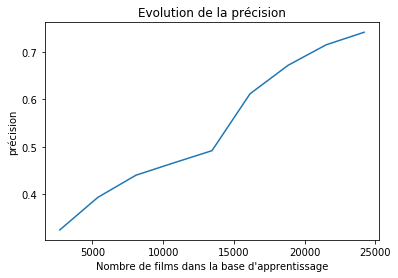

In [10]:
graphique_accuracy(10)

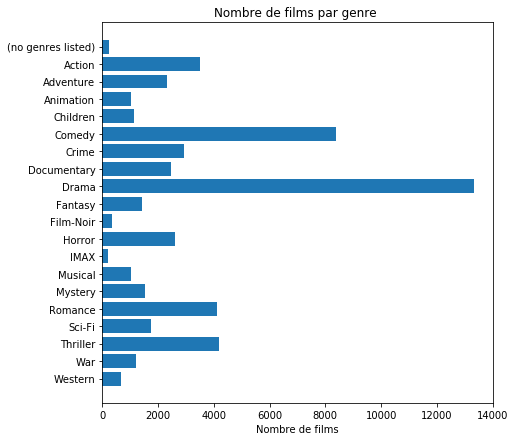

In [14]:
histogramme(movies,categories)